# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [ ]:
# Limpiar primero la tabla. Reemplazar los 9 por NA
# En year_group_5_years reemplazar los rangos de edad por la edad media

In [1]:
breastCancer<-read.csv("./data/BCSC_risk_factors_summarized.csv", sep = ",")

In [ ]:
summary(breastCancer$count)

In [ ]:
head(breastCancer)

In [ ]:
str(breastCancer)

In [2]:
breastCancerReplicate <- breastCancer[rep(row.names(breastCancer),breastCancer$count),1:12]

In [ ]:
str(breastCancerReplicate)

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [3]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
bCMuestras <- breastCancerReplicate[sample(1:nrow(breastCancerReplicate), 5000, replace = FALSE),]
head(bCMuestras)
tail(bCMuestras)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
923934.1,2007,12,1,0,2,9,2,0,2,9,1,0
956422.14,2008,5,3,0,9,9,3,9,9,9,1,0
177240.7,2001,7,1,0,9,9,2,9,2,9,0,0
1117808.40,2009,9,2,0,9,9,2,0,2,9,1,0
711838,2005,12,1,0,1,1,1,0,2,4,0,0
363863.53,2003,3,9,0,9,9,2,0,1,9,9,9


In [ ]:
str(bCMuestras)

In [ ]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
indexes <- sample( 1:nrow(breastCancerReplicate),5000)
bCMuestras2 <- breastCancerReplicate[indexes,]
head(bCMuestras2)
tail(bCMuestras2)

In [ ]:
?sample

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [4]:
unique(bCMuestras$race_eth)
unique(bCMuestras$first_degree_hx)
unique(bCMuestras$age_menarche)
unique(bCMuestras$age_first_birth)
unique(bCMuestras$BIRADS_breast_density)
unique(bCMuestras$current_hrt)
unique(bCMuestras$menopaus)
unique(bCMuestras$bmi_group)
unique(bCMuestras$biophx)
unique(bCMuestras$breast_cancer_history)

[1] 9 2 1 5 3 6 4

[1] 9 0 1

[1] 9 1 2 0

[1] 9 1 2 4 3 0

[1] 2 3 1 9 4

[1] 9 0 1

[1] 2 1 9 3

[1] 9 2 3 4 1

[1] 0 9 1

[1] 0 9 1

In [5]:
# Pasamos a factor las columnas que nos pide poniendo NA en los valores de los 9
bCMuestras$race_eth <- factor(bCMuestras$race_eth, labels=c(1,2,3,4,5,6,NA))   
bCMuestras$first_degree_hx <- factor(bCMuestras$first_degree_hx, labels=c(0,1,NA))
bCMuestras$age_menarche <- factor(bCMuestras$age_menarche, labels=c(0,1,2,NA))
bCMuestras$age_first_birth <- factor(bCMuestras$age_first_birth, labels=c(0,1,2,3,4,NA))
bCMuestras$BIRADS_breast_density <- factor(bCMuestras$BIRADS_breast_density, labels=c(1,2,3,4,NA))
bCMuestras$current_hrt <- factor(bCMuestras$current_hrt, labels=c(0,1,NA))
bCMuestras$menopaus <- factor(bCMuestras$menopaus, labels=c(1,2,3,NA))
bCMuestras$bmi_group <- factor(bCMuestras$bmi_group, labels=c(1,2,3,4,NA))
bCMuestras$biophx <- factor(bCMuestras$biophx, labels=c(0,1,NA))
bCMuestras$breast_cancer_history <- factor(bCMuestras$breast_cancer_history, labels=c(0,1,NA))

In [6]:
unique(bCMuestras$race_eth)
unique(bCMuestras$first_degree_hx)
unique(bCMuestras$age_menarche)
unique(bCMuestras$age_first_birth)
unique(bCMuestras$BIRADS_breast_density)
unique(bCMuestras$current_hrt)
unique(bCMuestras$menopaus)
unique(bCMuestras$bmi_group)
unique(bCMuestras$biophx)
unique(bCMuestras$breast_cancer_history)

[1] <NA> 2    1    5    3    6    4   
Levels: 1 2 3 4 5 6 <NA>

[1] <NA> 0    1   
Levels: 0 1 <NA>

[1] <NA> 1    2    0   
Levels: 0 1 2 <NA>

[1] <NA> 1    2    4    3    0   
Levels: 0 1 2 3 4 <NA>

[1] 2    3    1    <NA> 4   
Levels: 1 2 3 4 <NA>

[1] <NA> 0    1   
Levels: 0 1 <NA>

[1] 2    1    <NA> 3   
Levels: 1 2 3 <NA>

[1] <NA> 2    3    4    1   
Levels: 1 2 3 4 <NA>

[1] 0    <NA> 1   
Levels: 0 1 <NA>

[1] 0    <NA> 1   
Levels: 0 1 <NA>

In [ ]:
head(bCMuestras)

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [7]:
# Observamos que columnas tiene la tabla bVMuestras
str(bCMuestras)

'data.frame':	5000 obs. of  12 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 7 levels "1","2","3","4",..: 7 2 1 1 1 5 1 7 7 1 ...
 $ first_degree_hx      : Factor w/ 3 levels "0","1",NA: 3 1 1 2 1 1 1 3 1 3 ...
 $ age_menarche         : Factor w/ 4 levels "0","1","2",NA: 4 4 4 2 4 4 4 4 4 3 ...
 $ age_first_birth      : Factor w/ 6 levels "0","1","2","3",..: 6 6 6 2 6 6 6 6 2 6 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 3 1 5 5 1 2 ...
 $ current_hrt          : Factor w/ 3 levels "0","1",NA: 3 1 1 1 1 2 1 3 1 1 ...
 $ menopaus             : Factor w/ 4 levels "1","2","3",NA: 2 2 1 2 1 2 2 4 2 2 ...
 $ bmi_group            : Factor w/ 5 levels "1","2","3","4",..: 5 5 5 2 2 3 2 5 5 2 ...
 $ biophx               : Factor w/ 3 levels "0","1",NA: 1 1 1 1 1 1 1 3 1 1 ...
 $ breast_cancer_history: Factor w/ 3 levels "0

In [8]:
# Vemos que valores únicos tiene la columna $age_group_5_years
unique(bCMuestras$age_group_5_years)

[1]  8  7  5  3  6 10  9 11  2  4 13 12  1

In [9]:
# Creamos una nueva columna con los valores estimados de la columna $age_group_5_years
bCMuestras$age_Stimated <- factor(bCMuestras$age_group_5_years, labels = c(24,32,37,42,47,52,57,62,67,72,77,82,90))

In [10]:
# Pasamos a valores numéricos la columna $age_Stimated 
bCMuestras$age_Stimated <- as.numeric(as.character(bCMuestras$age_Stimated))

In [ ]:
head(bCMuestras)

In [ ]:
str(bCMuestras)

In [11]:
# Creamos la tabla df_Antecedentes_Fam que es un subconjunto de la tabla bCMuestras
df_Antecedentes_Fam <- subset(bCMuestras,select = c(first_degree_hx, age_Stimated))

# Pasamos a valores numericos la columna $age_Stimated de la tabla df_Antecedentes_Fam
df_Antecedentes_Fam$age_Stimated <-  as.numeric(as.character(df_Antecedentes_Fam$age_Stimated))
str(df_Antecedentes_Fam)

'data.frame':	5000 obs. of  2 variables:
 $ first_degree_hx: Factor w/ 3 levels "0","1",NA: 3 1 1 2 1 1 1 3 1 3 ...
 $ age_Stimated   : num  62 57 47 62 37 52 72 52 67 72 ...


In [ ]:
head(df_Antecedentes_Fam)

In [12]:
# Dividimos la tabla df_Antecedentes_Fam con las personas que no tienen antecedentes familiares
df_Antecedentes_Fam_0 <- df_Antecedentes_Fam[df_Antecedentes_Fam$first_degree_hx == "0",]
# Agregamos una nueva columna $type en la tabla df_Antecedentes_Fam_0 con valores de "No Antecedentes"
df_Antecedentes_Fam_0$type <- "No Antecedentes"

# Dividimos la tabla df_Antecedentes_Fam con las personas que tienen antecedentes familiares
df_Antecedentes_Fam_1 <- df_Antecedentes_Fam[df_Antecedentes_Fam$first_degree_hx == "1",]
# Agregamos una nueva columna $type en la tabla df_Antecedentes_Fam_1 con valores de "Antecedentes"
df_Antecedentes_Fam_1$type <- "Si Antecedentes"


In [ ]:
head(df_Antecedentes_Fam_0)
head(df_Antecedentes_Fam_1)

In [13]:
# Unimos las tablas df_Antecedentes_Fam_0 y df_Antecedentes_Fam_1 en una única tabla
df_Antecedentes_Fam_all <- rbind(df_Antecedentes_Fam_0,df_Antecedentes_Fam_1)

# Pasamos a valores numéricos la columna $first_degree_hx
df_Antecedentes_Fam_all$first_degree_hx <- as.numeric(as.character(df_Antecedentes_Fam_all$first_degree_hx))

In [14]:
# En la tabla df_Antecedentes_Fam_all quitamos todos los valores NA
df_Antecedentes_Fam_all <- na.omit(df_Antecedentes_Fam_all)

# Pasamos a data frame la tabla df_Antecedentes_Fam_all
df_Antecedentes_Fam_all <- data.frame(df_Antecedentes_Fam_all)
str (df_Antecedentes_Fam_all)
tail(df_Antecedentes_Fam_all)

'data.frame':	4511 obs. of  3 variables:
 $ first_degree_hx: num  0 0 0 0 0 0 0 0 0 0 ...
 $ age_Stimated   : num  57 47 37 52 72 67 52 77 32 42 ...
 $ type           : chr  "No Antecedentes" "No Antecedentes" "No Antecedentes" "No Antecedentes" ...


,first_degree_hx,age_Stimated,type
1039139,1,37,Si Antecedentes
220278.2,1,77,Si Antecedentes
985402.3,1,57,Si Antecedentes
300207.1,1,57,Si Antecedentes
354772.1,1,90,Si Antecedentes
318557.1,1,62,Si Antecedentes


In [15]:
# Creamos una nueva tabla en la que renombramos las columnas
df_Antecedentes_Fam_graf <- data.frame(edad=df_Antecedentes_Fam_all$age_Stimated, antecedentes = df_Antecedentes_Fam_all$first_degree_hx, tipo =df_Antecedentes_Fam_all$type )
head(df_Antecedentes_Fam_graf)

edad,antecedentes,tipo
57,0,No Antecedentes
47,0,No Antecedentes
37,0,No Antecedentes
52,0,No Antecedentes
72,0,No Antecedentes
67,0,No Antecedentes


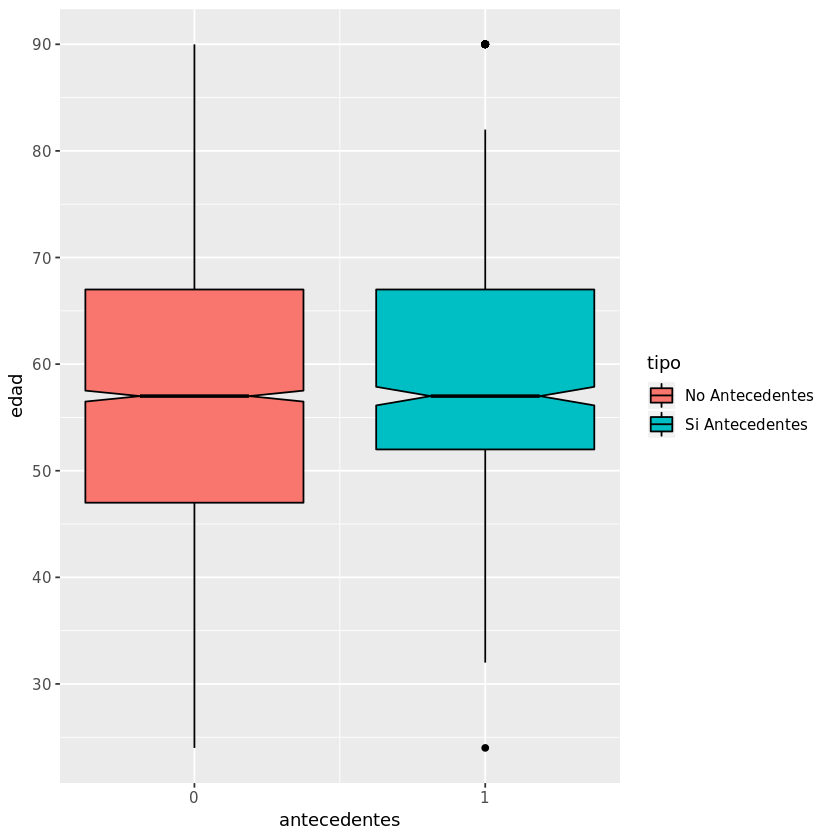

In [16]:
library(ggplot2)
ggplot(df_Antecedentes_Fam_graf, aes(x=antecedentes, y=edad, fill = tipo, group=tipo)) +
    geom_boxplot(color="black", notch=TRUE)+
    scale_x_continuous(breaks=c(0,1))+
    scale_y_continuous(breaks=c(10,20,30,40,50,60,70,80,90,100))

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [17]:
str(df_Antecedentes_Fam_all)
unique(df_Antecedentes_Fam_all$first_degree_hx)

'data.frame':	4511 obs. of  3 variables:
 $ first_degree_hx: num  0 0 0 0 0 0 0 0 0 0 ...
 $ age_Stimated   : num  57 47 37 52 72 67 52 77 32 42 ...
 $ type           : chr  "No Antecedentes" "No Antecedentes" "No Antecedentes" "No Antecedentes" ...


[1] 0 1

In [18]:
#df_Antecedentes_Fam_all$first_degree_hx <- factor(df_Antecedentes_Fam_all$first_degree_hx,labels =c(0,1))
mean_Ant_No <- mean(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==0])
print(paste(" La media de la edad de tener cancer y no tener antecedentes familiares es", round(mean_Ant_No,4)))
mean_Ant_Si <- mean(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==1])
print(paste(" La media de la edad de tener cancer y tener antecedentes familiares es", round(mean_Ant_Si,4)))
print("Las medias de edad de tener antecedentes o no familiares son diferentes")

[1] " La media de la edad de tener cancer y no tener antecedentes familiares es 56.5649"
[1] " La media de la edad de tener cancer y tener antecedentes familiares es 58.9593"
[1] "Las medias de edad de tener antecedentes o no familiares son diferentes"


In [19]:
var_Ant_Fam_No <- var(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==0])
print(paste(" La varianza de la edad de tener cancer y no tener antecedentes familiares es", round(var_Ant_Fam_No,4)))
var_Ant_Fam_Si <- var(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==1])
print(paste(" La varianza de la edad de tener cancer y tener antecedentes familiares es", round(var_Ant_Fam_Si,4)))


[1] " La varianza de la edad de tener cancer y no tener antecedentes familiares es 147.9999"
[1] " La varianza de la edad de tener cancer y tener antecedentes familiares es 165.3815"


**Aplicamos un test de Shapiro** para comprobar si es gaussiana o no la función de distribución

In [20]:
print("Test de Shapiro para la edad de tener cancer y no tener antecedentes familiares:")
shapiro.test(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==0])

print("Test de Shapiro para la edad de tener cancer y tener antecedentes familiares:")
shapiro.test(df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==1])
print("En ambos casos el p-value es muy bajo y no siguen una distribución normal")

[1] "Test de Shapiro para la edad de tener cancer y no tener antecedentes familiares:"



	Shapiro-Wilk normality test

data:  df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx ==     0]
W = 0.95966, p-value < 2.2e-16


[1] "Test de Shapiro para la edad de tener cancer y tener antecedentes familiares:"



	Shapiro-Wilk normality test

data:  df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx ==     1]
W = 0.96955, p-value = 2.929e-11


[1] "En ambos casos el p-value es muy bajo y no siguen una distribución normal"


Aplicamos un **test de Wilcoxon**

In [21]:
y1 <- df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==0]
y2 <- df_Antecedentes_Fam_all$age_Stimated[df_Antecedentes_Fam_all$first_degree_hx==1]

In [22]:
wilcox.test(y1,y2)


	Wilcoxon rank sum test with continuity correction

data:  y1 and y2
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


* Consideramos la H1 como verdadera y si hay influencia con la edad de tener cáncer y  tener antecedentes familires

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

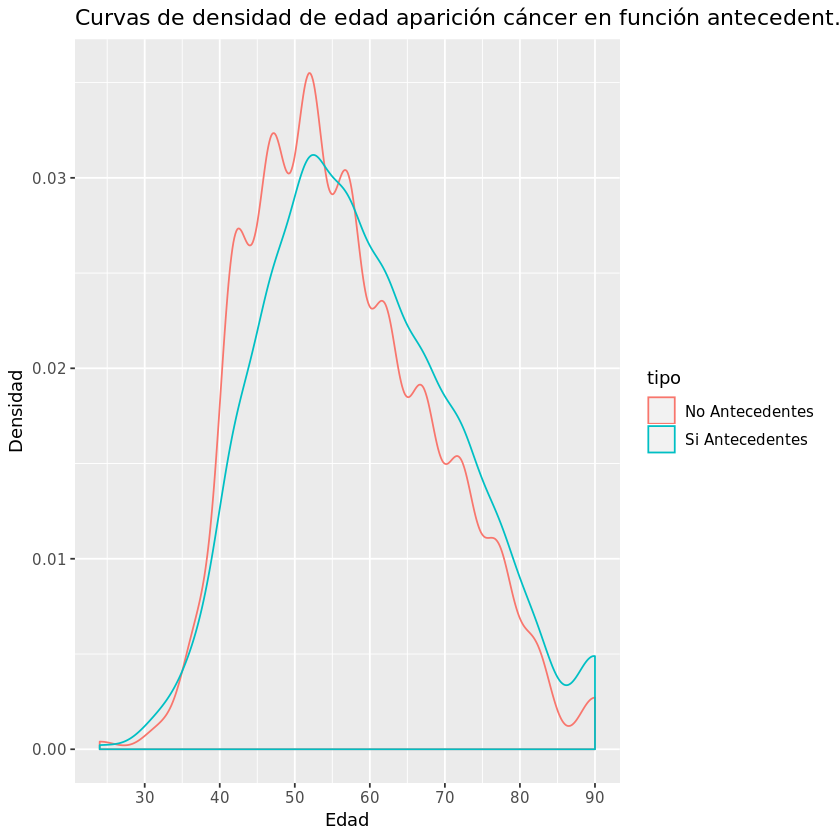

In [23]:
# Dibujamos el diagrama de densidad
ggplot(data=df_Antecedentes_Fam_graf, aes(x=edad,colour=tipo)) +
    geom_density(alpha=.3)+
    scale_x_continuous(breaks=c(10,20,30,40,50,60,70,80,90,100))+
    labs(title="Curvas de densidad de edad aparición cáncer en función antecedent. familiares",
         x="Edad", y="Densidad")

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

In [24]:
unique(bCMuestras$BIRADS_breast_density)

[1] 2    3    1    <NA> 4   
Levels: 1 2 3 4 <NA>

In [25]:
# Creamos la tabla df_BIRADS que es un subconjunto de la tabla bCMuestras
df_BIRADS <- subset(bCMuestras,select = c(BIRADS_breast_density, age_Stimated))

# Pasamos a valores numericos la columna $age_Stimated de la tabla df_BIRADS
df_BIRADS$age_Stimated <-  as.numeric(as.character(df_Antecedentes_Fam$age_Stimated))
str(df_BIRADS)

'data.frame':	5000 obs. of  2 variables:
 $ BIRADS_breast_density: Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 3 1 5 5 1 2 ...
 $ age_Stimated         : num  62 57 47 62 37 52 72 52 67 72 ...


In [26]:
# Dividimos la tabla df_BIRADS en varios subconjuntos
df_BIRADS_1 <- df_BIRADS[df_BIRADS$BIRADS_breast_density == "1",]
# Agregamos una nueva columna $type en la tabla df_BIRADS_1 con el valor "Almost entirely fat"
df_BIRADS_1$type <- "Almost entirely fat"

# Dividimos la tabla df_BIRADS en varios subconjuntos
df_BIRADS_2 <- df_BIRADS[df_BIRADS$BIRADS_breast_density == "2",]
# Agregamos una nueva columna $type en la tabla df_BIRADS_2 con valores de "Scatt. fibroglandular densities"
df_BIRADS_2$type <- "Scatt. fibroglandular densities"

# Dividimos la tabla df_BIRADS en varios subconjuntos
df_BIRADS_3 <- df_BIRADS[df_BIRADS$BIRADS_breast_density == "3",]
# Agregamos una nueva columna $type en la tabla df_BIRADS_3 con valores de "Heterogeneously dense"
df_BIRADS_3$type <- "Heterogeneously dense"

# Dividimos la tabla df_BIRADS en varios subconjuntos
df_BIRADS_4 <- df_BIRADS[df_BIRADS$BIRADS_breast_density == "4",]
# Agregamos una nueva columna $type en la tabla df_BIRADS_4 con valores de "Extremely dense"
df_BIRADS_4$type <- "Extremely dense"

In [27]:
# Unimos las tablas df_Antecedentes_Fam_0 y df_Antecedentes_Fam_1 en una única tabla
df_BIRADS_all <- rbind(df_BIRADS_1,df_BIRADS_2,df_BIRADS_3,df_BIRADS_4)

# Pasamos a valores numéricos la columna $first_degree_hx
df_BIRADS_all$BIRADS_breast_density <- as.numeric(as.character(df_BIRADS_all$BIRADS_breast_density))

In [28]:
# En la tabla df_BIRADS_all quitamos todos los valores NA
df_BIRADS_all <- na.omit(df_BIRADS_all)

# Pasamos a data frame la tabla df_Antecedentes_Fam_all
df_BIRADS_all <- data.frame(df_BIRADS_all)
str (df_BIRADS_all)
tail(df_BIRADS_all)

'data.frame':	3669 obs. of  3 variables:
 $ BIRADS_breast_density: num  1 1 1 1 1 1 1 1 1 1 ...
 $ age_Stimated         : num  52 67 52 32 57 52 72 57 72 47 ...
 $ type                 : chr  "Almost entirely fat" "Almost entirely fat" "Almost entirely fat" "Almost entirely fat" ...


,BIRADS_breast_density,age_Stimated,type
1116704.2,4,67,Extremely dense
367617,4,42,Extremely dense
564947,4,67,Extremely dense
888060.1,4,62,Extremely dense
836940,4,42,Extremely dense
25832.22,4,47,Extremely dense


In [29]:
# Creamos una nueva tabla en la que renombramos las columnas
df_BIRADS_all_graf <- data.frame(edad=df_BIRADS_all$age_Stimated, BIRADS = df_BIRADS_all$BIRADS_breast_density, tipo =df_BIRADS_all$type )
head(df_BIRADS_all_graf)

edad,BIRADS,tipo
52,1,Almost entirely fat
67,1,Almost entirely fat
52,1,Almost entirely fat
32,1,Almost entirely fat
57,1,Almost entirely fat
52,1,Almost entirely fat


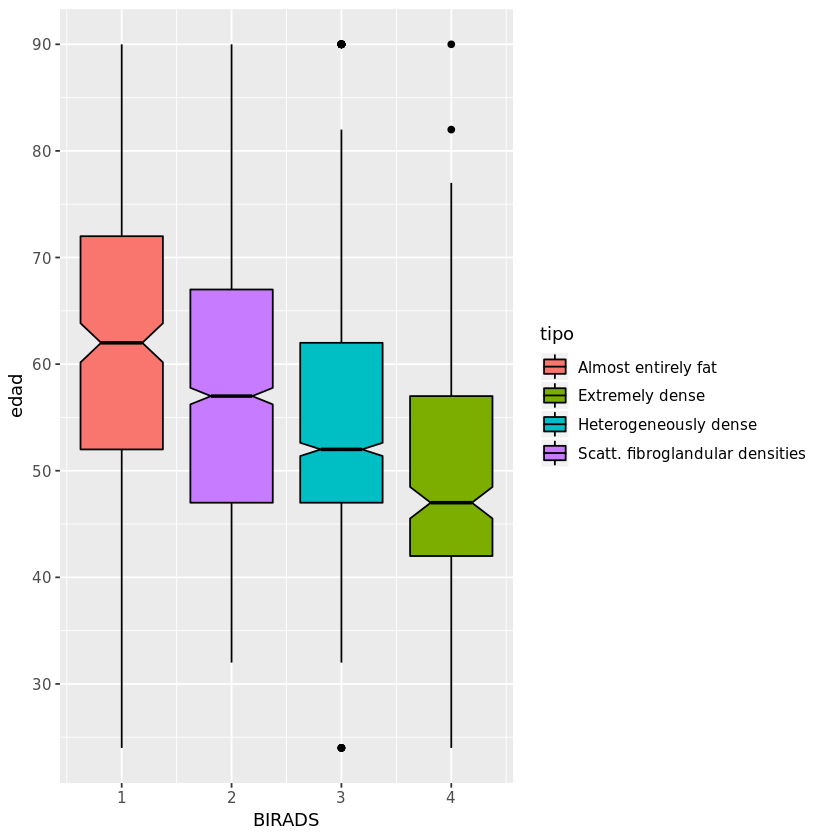

In [30]:
library(ggplot2)
ggplot(df_BIRADS_all_graf, aes(x=BIRADS, y=edad, fill = tipo, group=tipo)) +
    geom_boxplot(color="black", notch=TRUE)+
    scale_x_continuous(breaks=c(1,2,3,4))+
    scale_y_continuous(breaks=c(10,20,30,40,50,60,70,80,90,100))

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [ ]:
# Caracterizamos la edad en la que se detecta el cancer depende de la densidad del cáncer

In [31]:
# Calculamos la media de la edad con el BIRADS
mean_B1 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==1])
print(paste(" La media de la edad de tener cancer y tener un BIRADS 1 es", round(mean_B1,4)))
mean_B2 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==2])
print(paste(" La media de la edad de tener cancer y tener un BIRADS 2 es", round(mean_B2,4)))
mean_B3 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==3])
print(paste(" La media de la edad de tener cancer y tener un BIRADS 3 es", round(mean_B3,4)))
mean_B4 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==4])
print(paste(" La media de la edad de tener cancer y tener un BIRADS 4 es", round(mean_B4,4)))

[1] " La media de la edad de tener cancer y tener un BIRADS 1 es 60.3973"
[1] " La media de la edad de tener cancer y tener un BIRADS 2 es 58.6841"
[1] " La media de la edad de tener cancer y tener un BIRADS 3 es 55.2633"
[1] " La media de la edad de tener cancer y tener un BIRADS 4 es 50.7969"


In [32]:
# Calculamos la varianza de la edad con el BIRADS
var_B1 <- var(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==1])
print(paste(" La varianza de la edad de tener cancer y tener un BIRADS 1 es", round(var_B1,4)))
var_B2 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==2])
print(paste(" La varianza de la edad de tener cancer y tener un BIRADS 2 es", round(var_B2,4)))
var_B3 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==3])
print(paste(" La varianza de la edad de tener cancer y tener un BIRADS 3 es", round(var_B3,4)))
var_B4 <- mean(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==4])
print(paste(" La varianza de la edad de tener cancer y tener un BIRADS 4 es", round(var_B4,4)))

[1] " La varianza de la edad de tener cancer y tener un BIRADS 1 es 153.1659"
[1] " La varianza de la edad de tener cancer y tener un BIRADS 2 es 58.6841"
[1] " La varianza de la edad de tener cancer y tener un BIRADS 3 es 55.2633"
[1] " La varianza de la edad de tener cancer y tener un BIRADS 4 es 50.7969"


In [33]:
# Calculamos el test de Shapiro de la edad con el BIRADS
shap_B1 <- shapiro.test(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==1])$p.value
print(paste("Test de Shapiro para la edad de tener cancer y tener un BIRADS 1 es:",round(shap_B1,12)))

shap_B2 <- shapiro.test(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==2])$p.value
print(paste("Test de Shapiro para la edad de tener cancer y tener un BIRADS 2 es:",round(shap_B2,12)))

shap_B3 <- shapiro.test(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==3])$p.value
print(paste("Test de Shapiro para la edad de tener cancer y tener un BIRADS 3 es:",round(shap_B3,12)))

shap_B4 <- shapiro.test(df_BIRADS_all$age_Stimated[df_BIRADS_all$BIRADS_breast_density==4])$p.value
print(paste("Test de Shapiro para la edad de tener cancer y tener un BIRADS 4 es:",round(shap_B4,12)))


[1] "Test de Shapiro para la edad de tener cancer y tener un BIRADS 1 es: 0.000146333957"
[1] "Test de Shapiro para la edad de tener cancer y tener un BIRADS 2 es: 0"
[1] "Test de Shapiro para la edad de tener cancer y tener un BIRADS 3 es: 0"
[1] "Test de Shapiro para la edad de tener cancer y tener un BIRADS 4 es: 2.101e-09"


* Como el p-value que nos dan en el test de Shapiro es menor que 0,005 concluimos que no sigue una distribución normal

In [34]:
# Aplicamos el test de Bartlett
bartlett.test(edad~BIRADS, data = df_BIRADS_all_graf)


	Bartlett test of homogeneity of variances

data:  edad by BIRADS
Bartlett's K-squared = 20.28, df = 3, p-value = 0.0001485


* En el test de Bartlett obtenemos un p-value muy bajo, menor de 0.005 , por lo que cogemos la H1 donde las varianzas son distintas

In [37]:
# Aplicamos el Kruskal–Wallis test
#wilcox.test(mpg ~ am, data=mtcars)
kruskal.test(edad~BIRADS, data = df_BIRADS_all_graf)


	Kruskal-Wallis rank sum test

data:  edad by BIRADS
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


* Como el test de Kruskal nos sale un valor de p-value < 0.001 concluimos que la edad no es la misma en cada uno de los 4 tipos de cancer

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [42]:
# Frecuencia de cada tipo de BIRADS
tableBirads <- table(df_BIRADS_all$BIRADS_breast_density)
tableBirads


   1    2    3    4 
 297 1665 1451  256 

In [45]:
# Porcentaje de cada tipo de BIRADS 
probBirads <- prop.table(mytable)*100
probBirads


        1         2         3         4 
 8.094849 45.380213 39.547561  6.977378 

In [46]:
# Mediante un Test de Chi cuadrado
chisq.test(probBirads)


	Chi-squared test for given probabilities

data:  probBirads
X-squared = 49.503, df = 3, p-value = 1.019e-10


In [ ]:
table(dfchurn[,c(col,"Churn")])
chisq.test(table(dfchurn[,c(col,"Churn")]))

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [51]:
print(paste("El cancer mas común de tipo 2 ",round(probBirads[2],2)))

[1] "El cancer mas común de tipo 2  45.38"


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [53]:
str(bCMuestras)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 7 levels "1","2","3","4",..: 7 2 1 1 1 5 1 7 7 1 ...
 $ first_degree_hx      : Factor w/ 3 levels "0","1",NA: 3 1 1 2 1 1 1 3 1 3 ...
 $ age_menarche         : Factor w/ 4 levels "0","1","2",NA: 4 4 4 2 4 4 4 4 4 3 ...
 $ age_first_birth      : Factor w/ 6 levels "0","1","2","3",..: 6 6 6 2 6 6 6 6 2 6 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 3 1 5 5 1 2 ...
 $ current_hrt          : Factor w/ 3 levels "0","1",NA: 3 1 1 1 1 2 1 3 1 1 ...
 $ menopaus             : Factor w/ 4 levels "1","2","3",NA: 2 2 1 2 1 2 2 4 2 2 ...
 $ bmi_group            : Factor w/ 5 levels "1","2","3","4",..: 5 5 5 2 2 3 2 5 5 2 ...
 $ biophx               : Factor w/ 3 levels "0","1",NA: 1 1 1 1 1 1 1 3 1 1 ...
 $ breast_cancer_history: Factor w/ 3 levels "0

In [57]:
# Pasamos a valores númericas las columnas $first_degree_hx y $BIRADS_breast_density
bCMuestras$first_degree_hx <- as.numeric(as.character(bCMuestras$first_degree_hx))
bCMuestras$BIRADS_breast_density <- as.numeric(as.character(bCMuestras$BIRADS_breast_density))

# Omitimos los NA del data frame bCMuestras_2
bCMuestras_1 <- na.omit(bCMuestras)

In [58]:

summary(lm(data = bCMuestras_1, BIRADS_breast_density~first_degree_hx))


Call:
lm(formula = BIRADS_breast_density ~ first_degree_hx, data = bCMuestras_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4550 -0.4499 -0.4499  0.5501  1.5501 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.449861   0.013786 177.703   <2e-16 ***
first_degree_hx 0.005157   0.033682   0.153    0.878    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7388 on 3448 degrees of freedom
Multiple R-squared:  6.798e-06,	Adjusted R-squared:  -0.0002832 
F-statistic: 0.02344 on 1 and 3448 DF,  p-value: 0.8783


* p-value es alta por lo que existe una dependencia entre el tipo de cáncer y los antecedentes familiares

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [60]:
unique(bCMuestras$race_eth)

[1] <NA> 2    1    5    3    6    4   
Levels: 1 2 3 4 5 6 <NA>

In [61]:
str(bCMuestras)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 7 levels "1","2","3","4",..: 7 2 1 1 1 5 1 7 7 1 ...
 $ first_degree_hx      : num  NA 0 0 1 0 0 0 NA 0 NA ...
 $ age_menarche         : Factor w/ 4 levels "0","1","2",NA: 4 4 4 2 4 4 4 4 4 3 ...
 $ age_first_birth      : Factor w/ 6 levels "0","1","2","3",..: 6 6 6 2 6 6 6 6 2 6 ...
 $ BIRADS_breast_density: num  2 2 2 2 3 1 NA NA 1 2 ...
 $ current_hrt          : Factor w/ 3 levels "0","1",NA: 3 1 1 1 1 2 1 3 1 1 ...
 $ menopaus             : Factor w/ 4 levels "1","2","3",NA: 2 2 1 2 1 2 2 4 2 2 ...
 $ bmi_group            : Factor w/ 5 levels "1","2","3","4",..: 5 5 5 2 2 3 2 5 5 2 ...
 $ biophx               : Factor w/ 3 levels "0","1",NA: 1 1 1 1 1 1 1 3 1 1 ...
 $ breast_cancer_history: Factor w/ 3 levels "0","1",NA: 1 1 1 1 1 1 1 3 1 1 ...
 $ age_Stimated      

In [63]:
bCMuestras$race_eth <- as.numeric(as.character(bCMuestras$race_eth))
bCMuestras_2 <- na.omit(bCMuestras)

In [64]:
summary(lm(data = bCMuestras_2, BIRADS_breast_density~race_eth))


Call:
lm(formula = BIRADS_breast_density ~ race_eth, data = bCMuestras_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5275 -0.4474 -0.4474  0.5526  1.5526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.43137    0.02141 113.584   <2e-16 ***
race_eth     0.01602    0.01099   1.458    0.145    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7416 on 3111 degrees of freedom
Multiple R-squared:  0.0006828,	Adjusted R-squared:  0.0003616 
F-statistic: 2.126 on 1 and 3111 DF,  p-value: 0.1449


* A pesar de que hay un p-value elevado, el R^2 es bajo. Por lo que no hay na dependencia entre el tipo de cáncer y la raza

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [ ]:
#Lo que hay que hacer primero es filtrar por "Native American" y quedarse solo con la columna  BIRADS_breast_density.
#Aquí es donde se eliminan los NA, y se calcula la proporción.

In [104]:
# Creamos la tabla df_race que es un subconjunto de la tabla bCMuestras
df_bCrace <- subset(bCMuestras,select = c(race_eth, BIRADS_breast_density))

In [105]:
# Dividimos la tabla df_BIRADS en varios subconjuntos
df_bC_Americanos <- df_bCrace[df_bCrace$race_eth == 4,]
tail(df_bC_Americanos)

,race_eth,BIRADS_breast_density
NA.603,NA,NA
NA.604,NA,NA
NA.605,NA,NA
NA.606,NA,NA
NA.607,NA,NA
NA.608,NA,NA


In [106]:
#df_Regions_Graph <- data.frame(region=df_Regions$Country.Code, year=df_Regions$variable , TotalCO2=df_Regions$value)
df_americanos_Birads <- data.frame(americanos_Birads =df_bC_Americanos$BIRADS_breast_density)

In [107]:
str(df_americanos_Birads)

'data.frame':	635 obs. of  1 variable:
 $ americanos_Birads: num  NA NA NA NA NA NA NA NA NA NA ...


In [70]:
#unique(df_bC_Americanos$race_eth)

[1] NA  4

In [112]:
# Eliminamos los valores NA del dataframe df_americanos_Birads
df_americanos_Birads <- na.omit(df_americanos_Birads)
head(df_americanos_Birads)
str(df_americanos_Birads)

,americanos_Birads
17,3
29,3
78,2
92,4
109,3
114,1


'data.frame':	17 obs. of  1 variable:
 $ americanos_Birads: num  3 3 2 4 3 1 4 2 2 3 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:618] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..- attr(*, "names")= chr [1:618] "1" "2" "3" "4" ...


In [131]:
# Hacemos una tabla de conteos con la columna $americanos_Birads
mytable <- table(df_americanos_Birads$americanos_Birads)
mytable



1 2 3 4 
1 7 6 3 

In [139]:
# Calculamos una tabla de proporciones
mytable_1 <- prop.table(mytable)
mytable_1


         1          2          3          4 
0.05882353 0.41176471 0.35294118 0.17647059 

In [156]:
print(paste("La probabilidad de que un americano nativo tenga cancer del tipo dos es " ,round(mytable_1[2]*100,4),"% de probabilidad "))


[1] "La probabilidad de que un americano nativo tenga cancer del tipo dos es  41.1765 % "
